# Factorial Experiment for Session Duration on Instagram Based on Ad Type and Ad Frequency

[mahshidxyz](http://www.github.com/mahshidxyz)

July 2020

---

Factorial experiments are effective ways to explore the influence of several factors on the dependent variable. The data for this experiment is from a platform like Instagram trying to understand the influence of their ads on user engagement. Engagement is measured by the session duration in minutes so we have a continuous dependent variable. Two factors have been considered in this experiment: ad frequency at 4 levels (None, 7:1, 4:1, 1:1) and ad type at 2 levels (photo and video). This results in 7 unique groups because when the ad frequency is None ad type is meaningless. 2000 samples were taken from no ad group and 1000 samples were taken from the combination groups.

| Factors | Level 1 | Level 2 | Level 3 | Level 4 |
|:-|:-|:-|:-|:-|
| Ad Frequency | None (0) | 7:1 (1) | 4:1 (2)| 1:1 (3) |
| Ad Type | Photo (1) | Video (2) |

I will use linear regression and factorial ANOVA to test the significance of the main effects and interactions. Both methods show that all the main effects and interactions are significant.

# Data

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics.factorplots as smfp

# set the rcParams globally, see the full list at plt.rcParams.keys() 
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 'x-large'
plt.rcParams['legend.title_fontsize'] = 'x-large'
plt.rcParams['figure.titlesize'] = 'x-large'

In [2]:
# import data
df = pd.read_csv("instagram_user_eng.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Time       8000 non-null   float64
 1   Frequency  8000 non-null   int64  
 2   Type       8000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 187.6 KB


In [4]:
# Summary of the experiment results, avg session duration in each group
df.rename(columns={'Type': 'Ad Type', 'Frequency' : 'Ad Frequency', 'Time' : 'Session Duration'}, inplace=True)
dfs = df.groupby(['Ad Type','Ad Frequency'])['Session Duration'].agg({'mean', 'count'}).reset_index()
dfs.rename(columns={'count': 'Sample Size', 'mean' : 'Avg Session Duration (min)'}, inplace=True)
print('Note that group 0 and 4 have no ads')
dfs

Note that group 0 and 4 have no ads


,Ad Type,Ad Frequency,Sample Size,Avg Session Duration (min)
0,1,0,1000,6.977854
1,1,1,1000,5.008560
2,1,2,1000,3.975815
3,1,3,1000,1.019292
4,2,0,1000,7.087786
5,2,1,1000,5.636176
6,2,2,1000,4.834985
7,2,3,1000,1.476534


# Main Effect and Interaction Plots

The main effect plots suggest that:

- With an increase in ad frequency session duration decreases
- Sessions with video ads have slightly longer durations than sessions with photo ads
- Ad frequency has a larger influence than ad type

The interaction plots suggest that:

- Ad frequency does not have quite the same effect for both ad types; therefore an interaction might be present.
- Ad type does not have quite the same effect for all ad frequencies; therefore an interaction might be present.

Note that an Ad Frequency of “None” indicates no ads, so Ad Type becomes irrelevant. The data related to the “no ad” group has been removed from Ad type main effect and interaction plots.

In the interaction plots, we represent the group means. Parallel lines represent a lack of interaction and non-parallel lines represent an attraction. If an attraction effect is significant, it might not make sense to interpret the main effects. In this example the lines are not parallel but attraction doesn't seem to be very strong either. In the next step, a linear regression will be performed to decide on the significance of the main and interaction effects.

In [5]:
# use the data only containing ads for Ad Type and interaction plots
# smfp.interaction_plot requires index to be continuous so reset_index after filtering!
df2 = df[df['Ad Frequency'] != 0].reset_index(drop=True)

## Main Effect Plots

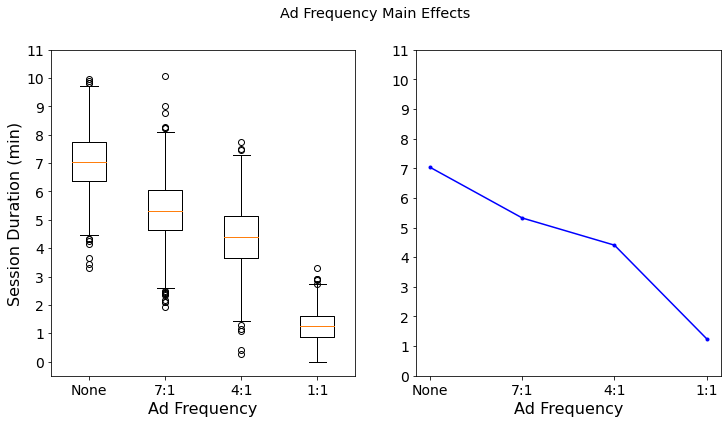

In [6]:
## Ad frequency main effect plots

fig, ax = plt.subplots(1,2, figsize=(12,6))

plt.subplot(1,2,1)
yf1 = df[df['Ad Frequency']==0]['Session Duration']
yf2 = df[df['Ad Frequency']==1]['Session Duration']
yf3 = df[df['Ad Frequency']==2]['Session Duration']
yf4 = df[df['Ad Frequency']==3]['Session Duration']
yf = [yf1, yf2, yf3, yf4]
plt.boxplot(yf, labels = ['None', '7:1', '4:1', '1:1'])
plt.xlabel('Ad Frequency')
plt.ylabel('Session Duration (min)')
plt.yticks([x for x in range(0,12)])

plt.subplot(1,2,2)
me_freq = df.groupby('Ad Frequency')['Session Duration'].mean()
plt.plot(me_freq, color = 'blue', marker = '.')
plt.xlabel('Ad Frequency')
plt.xticks([0,1,2,3], ['None', '7:1', '4:1', '1:1'])
plt.yticks([x for x in range(0,12)])

plt.suptitle('Ad Frequency Main Effects');

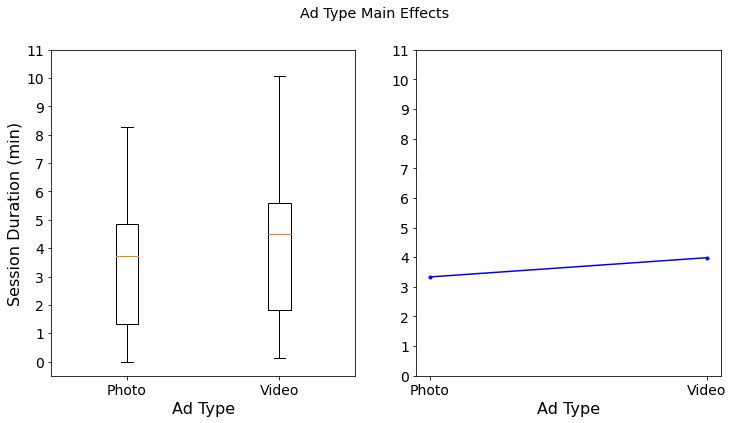

In [7]:
## Ad type main effect plots
fig, ax = plt.subplots(1,2, figsize=(12,6))

plt.subplot(1,2,1)
yt1 = df2[df2['Ad Type']==1]['Session Duration']
yt2 = df2[df2['Ad Type']==2]['Session Duration']
yt = [yt1, yt2]
plt.boxplot(yt, labels = ['Photo', 'Video'])
plt.xlabel('Ad Type')
plt.ylabel('Session Duration (min)')
plt.yticks([x for x in range(0,12)])

plt.subplot(1,2,2)
me_type = df2.groupby('Ad Type')['Session Duration'].mean()
plt.plot(me_type, color = 'blue', marker = '.')
plt.xlabel('Ad Type')
plt.xticks([1,2], ['Photo', 'Video'])
plt.yticks([x for x in range(0,12)])

plt.suptitle('Ad Type Main Effects');

## Interaction Plots

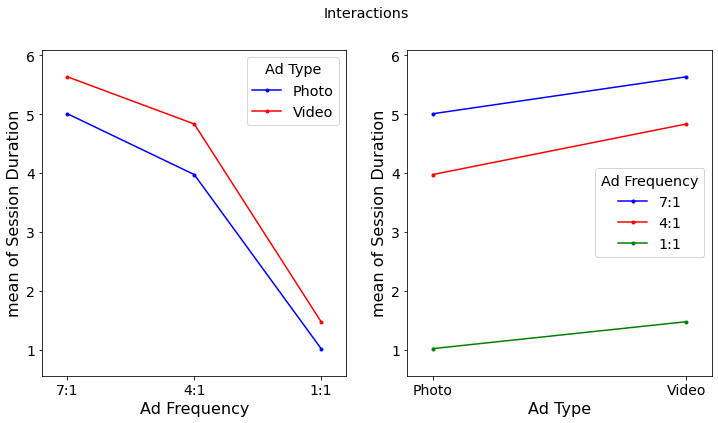

In [8]:
# Interaction plots
fig, ax = plt.subplots(1,2, figsize=(12,6))

_ = smfp.interaction_plot(x = df2['Ad Frequency'], trace = df2['Ad Type'], response = df2['Session Duration'], colors = ['blue', 'red'], ax = ax[0])
ax[0].set_xticks([1,2,3])
ax[0].set_xticklabels(['7:1', '4:1', '1:1'])
ax[0].set_xlabel('Ad Frequency')
ax[0].legend(['Photo', 'Video'], title = 'Ad Type', loc='upper right')

_ = smfp.interaction_plot(x = df2['Ad Type'], trace = df2['Ad Frequency'], response = df2['Session Duration'], colors = ['blue', 'red', 'green'], ax = ax[1])
ax[1].set_xticks([1,2])
ax[1].set_xticklabels(['Photo', 'Video'])
ax[1].set_xlabel('Ad Type')
ax[1].legend(['7:1', '4:1', '1:1'], title = 'Ad Frequency', loc='center right')

plt.suptitle('Interactions');

# Linear Regression

To analyze the significance of the main effects and interactions I will use linear regression. One-hot encoding is necessary for building a regression model with categorical variables. Here I will use a feature in the Statsmodels library called contrast coding which produces the dummy variables for us under the hood (see [here](https://www.statsmodels.org/devel/contrasts.html)).

The number of indicators for a particular factor is equal to the number of levels of that factor minus 1, to maintain the linear independence of the levels. So here we will have 1 indicator for Ad Type and two indicators for Ad Frequency.
Two factors results in 2-way interactions. For a 2 x 3 factorial experiment, there is a total of (2-1) x (3-1) = 2 interaction terms.

The full model for this problem is:


\begin{equation*}
Y = \beta_0 + \beta_1 x_{11} + \beta_2 x_{21} + \beta_3 x_{22} + \beta_4 x_{11} x_{21} + \beta_5 x_{11} x_{22} + \epsilon
\end{equation*}


The result of the full linear regression model shows that all main and interaction terms are significant at all levels (p-val < 0.05).


**Side Note:** In regression, adding interaction terms makes the coefficients of the lower order terms conditional effects, not main effects.  That means that the effect of one predictor is conditional on the value of the other. The coefficient of the lower order term isn’t the effect of that term. It’s the effect only when the other term in the interaction equals 0. Therefore, one should not drop the lower order terms if they are not significant. Also when an interaction effect is significant, we should not try to interpret the importance of main effects in isolation. When an interaction effect exists, the effect of one independent variable depends on the value(s) of one or more other independent variables.

In [9]:
# Linear regression model

# for ols, column names should not have spaces
df2.columns = ['Session_Duration', 'Ad_Frequency', 'Ad_Type'] 

model = smf.ols('Session_Duration ~ C(Ad_Frequency) * C(Ad_Type)', data = df2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Session_Duration   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     5118.
Date:                Mon, 03 Aug 2020   Prob (F-statistic):               0.00
Time:                        01:49:47   Log-Likelihood:                -7608.6
No. Observations:                6000   AIC:                         1.523e+04
Df Residuals:                    5994   BIC:                         1.527e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                                5.0086      0.027    184.078      0.000       4.955       5.062
C(Ad_Frequency)[T.2]                    -1.0327      0.038    -26.839      0.000      -1.108      -0.957
C(Ad_Frequency)[T.3]                    -3.9893      0.038   -103.673      0.000      -4.065      -3.914
C(Ad_Type)[T.2]                          0.6276      0.038     16.310      0.000       0.552       0.703
C(Ad_Frequency)[T.2]:C(Ad_Type)[T.2]     0.2316      0.054      4.255      0.000       0.125       0.338
C(Ad_Frequency)[T.3]:C(Ad_Type)[T.2]    -0.1704      0.054     -3.131      0.002      -0.277      -0.064
==============================================================================
Omnibus:                       77.883   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.624
Skew:                          -0.042   Prob(JB):                     7.91e-31
Kurtosis:                       3.740   Cond. No.                         9.77
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 2-way Factorial ANOVA

In this section, I will test the significance of the main and interaction terms from the factor perspective by ANOVA. Given that the levels of these factor have been shown to be significant already in the regression model, this study is not necessary but it is included for completeness and to provide a comparison between the use of linear regression and ANOVA for hypothesis testing. 


ANOVA null hypothesis is different from linear model. For every term, linear model null hypothesis equals its coefficient to zero. ANOVA null hypothesis is whether group means of the dependent variable are not significantly different. The alternative hypothesis is that at least one of the factor level forms a group of observations with a mean value different from overall mean. There are three null hypothesis in two-way ANOVA, with an F-test for each. Assume we have two factors: A and B. We test for significance of the main effect of A, the main effect of B, and the AB interaction. It is generally good practice to examine the test for interaction first because the presence of a strong interaction may influence the interpretation of the main effects. F-statistic used in ANOVA applies to measuring a significant decrease in residual sum of squares attributed to the model one has built in comparison with intercept-only model.

To test the main effect of A, the F-statistic is:

\begin{equation*}
F = \frac{\text{mean square between group A}}{\text{mean square residuals}}
= \frac{MS(A)}{MSE} 
\end{equation*}

To test the main effect of B, the F-statistic is:

\begin{equation*}
F = \frac{MS(B)}{MSE} 
\end{equation*}

To test the interaction of A and B, the F-statistic is:

\begin{equation*}
F = \frac{MS(AB)}{MSE} 
\end{equation*}

If the effect being tested is zero, the calculated F-statistic has an F distribution with numerator degrees of freedom corresponding to the effect and denominator degrees of freedom equal to residuals degree of freedom. Large values of the F-statistic lead to rejection of the null hypothesis. The p-value is the probability that a random variable having the corresponding F distribution is greater than or equal to the calculated value.

The p-values in the ANOVA table are < 0.05 so we reject all of the three null hypothesis. We conclude ad frequency, ad type, and the interaction between these factors are significant; in other words, in each group there is at least one term with significant effect on the dependent variable. However, to understand which terms are significant we must do pairwise tests or build a linear regression model, which has been already done in the previous section. 

**Side Notes:** In an ANOVA, adding interaction terms still leaves the main effects as main effects. That is, as long as the data are balanced, the main effects and the interactions are independent. The main effect is still telling you if there is an overall effect of that variable after accounting for other variables in the model.

In [10]:
# ANOVA to evaluate the significance of main and interaction effects
# F-stat = mean-sq (group) / mean-square (residuals)
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(Ad_Frequency),2.0,18274.493775,9137.246887,12342.159896,0.000000e+00
C(Ad_Type),1.0,629.874166,629.874166,850.804160,5.074446e-175
C(Ad_Frequency):C(Ad_Type),2.0,40.698425,20.349212,27.486751,1.309376e-12
Residual,5994.0,4437.526195,0.740328,NaN,NaN


# How is ANOVA equivalent to linear regression?


As explained above, linear regression and ANOVA have different null hypotheses. The full linear model provides more information than ANOVA does; it provides information about the significance of each **level** in each group. But we often hear that ANOVA and linear regression are the same analysis or equivalent. In this section I will explain how linear regression and ANOVA tests are related to each other.

Linear models produce estimates of the coefficient values along with the significance of them not being zero. The hypothesis tests in ANOVA correspond to simultaneously setting a subset of the $\beta$ values to zero in the linear model, therefore each hypothesis will generate a reduced model.


In our example, the full model is:

\begin{equation*}
\text{full model}: Y = \beta_0 + \beta_1 x_{11} + \beta_2 x_{21} + \beta_3 x_{22} + \beta_4 x_{11} x_{21} + \beta_5 x_{11} x_{22} + \epsilon
\end{equation*}


1. The test for the significance of the main effect of ad type becomes:
    - $H_0: \beta_1 = 0$
    - $H_1: \beta_1 \ne 0$
    

2. The test for the significance of the main effect of ad frequency becomes:
    - $H_0: \beta_{2} = \beta_{3} = 0$
    - $H_1: \beta_j \ne 0$ for at least one of $j=2,3$
    

3. The test for the significance of the interactions becomes:
    - $H_0: \beta_4 = \beta_5 = 0$
    - $H_1: \beta_j \ne 0$ for at least one of $j=4,5$
    
For each null, we can build the reduced model and compare it with the full model to determine if the difference is significant. This is done with a partial F-test. This procedure produces similar results to ANOVA.

\begin{equation*}
F = \frac{({SS_{reduced} - SS_{full}})/{\Delta{p}}}  {MSE_{full}}
\end{equation*}

where $\Delta{p}$ is the number of coefficients being tested. This procedure produces similar results to ANOVA. Here, I have compared a reduced model with no interaction terms with the full model which was built earlier. The results are similar to factorial anova and show that the interaction group is significant so at least one of the interaction terms is significant.

In [11]:
# reduced linear regression model with no interactions
model_reduced = smf.ols('Session_Duration ~ C(Ad_Frequency) + C(Ad_Type)', data = df2).fit()
model_reduced.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Session_Duration   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     8437.
Date:                Mon, 03 Aug 2020   Prob (F-statistic):               0.00
Time:                        01:49:47   Log-Likelihood:                -7636.0
No. Observations:                6000   AIC:                         1.528e+04
Df Residuals:                    5996   BIC:                         1.531e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                4.9984      0.022    224.002      0.000       4.955       5.042
C(Ad_Frequency)[T.2]    -0.9170      0.027    -33.553      0.000      -0.971      -0.863
C(Ad_Frequency)[T.3]    -4.0745      0.027   -149.090      0.000      -4.128      -4.021
C(Ad_Type)[T.2]          0.6480      0.022     29.041      0.000       0.604       0.692
==============================================================================
Omnibus:                       74.993   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.449
Skew:                          -0.044   Prob(JB):                     2.86e-29
Kurtosis:                       3.720   Cond. No.                         4.22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
# compare the full and reduced models
# note that the F-stat is same as the F-stat for interactions in factorial ANOVA.
sm.stats.anova_lm(model_reduced, model)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,5996.0,4478.224620,0.0,NaN,NaN,NaN
1,5994.0,4437.526195,2.0,40.698425,27.486751,1.309376e-12
